In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd

In [5]:
# import csv
df = pd.read_csv('smoking_and_drinking_dataset.zip')
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [73]:
# print regions
print(df['Region'].unique())

['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']


In [74]:
# make region into continents
df1 = df.copy()
df1['Region'] = df['Region'].replace(['Western Europe', 'North America', 'Australia and New Zealand', 'Middle East and Northern Africa', 'Latin America and Caribbean', 'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia', 'Sub-Saharan Africa', 'Southern Asia'], ['Europe', 'North America', 'Oceania', 'Asia', 'South America', 'Asia', 'Europe', 'Asia', 'Africa', 'Asia'])
# rename region to continent
df1.rename(columns={'Region':'Continent'}, inplace=True)
# remove columns with lower and upper confidence interval
df1 = df1.drop(['Lower Confidence Interval', 'Upper Confidence Interval'], axis=1)
df1.head()

,Country,Continent,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [75]:
# df2 rank each contry by each score
df2 = df1.copy()
for i in df2.columns[3:11]:
    # rank each column by descending order
    df2[i] = df2[i].rank(ascending=False).astype(int)
    
# sum all the ranks into a new column
df2['Total Rank'] = df2['Economy (GDP per Capita)'] + df2['Family'] + df2['Health (Life Expectancy)'] + df2['Freedom'] + df2['Trust (Government Corruption)'] + df2['Generosity'] + df2['Dystopia Residual']
df2.head()

,Country,Continent,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Total Rank
0,Denmark,Europe,1,1,17,4,30,7,4,29,31,122
1,Switzerland,Europe,2,2,7,6,7,4,6,48,36,114
2,Iceland,Europe,3,3,20,1,6,13,50,11,24,125
3,Norway,Europe,4,4,5,9,28,2,10,27,40,121
4,Finland,Europe,5,5,22,7,23,9,7,60,26,154


In [76]:
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 157 rows and 11 columns


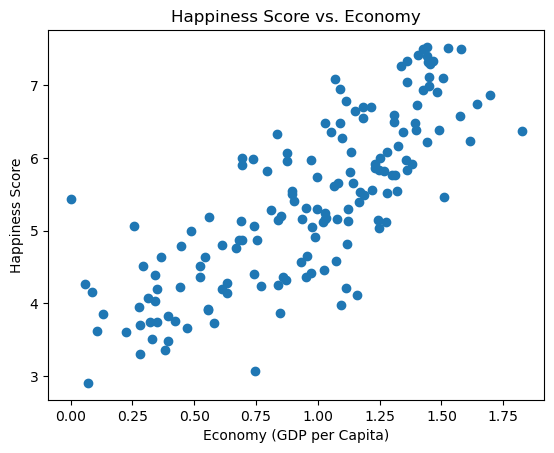

In [77]:
# plot happiness score vs. economy
plt.scatter(df['Economy (GDP per Capita)'], df['Happiness Score'])
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.title('Happiness Score vs. Economy')
plt.show()

In [78]:
# lowest happiness score
df1[df1['Economy (GDP per Capita)'] == df1['Economy (GDP per Capita)'].min()]

,Country,Continent,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
75,Somalia,Africa,76,5.44,0.0,0.33613,0.11466,0.56778,0.3118,0.27225,3.83772


In [79]:
# find values of 0
df1[df1 == 0].count()

Country                          0
Continent                        0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         1
Family                           1
Health (Life Expectancy)         1
Freedom                          1
Trust (Government Corruption)    1
Generosity                       1
Dystopia Residual                0
dtype: int64

In [80]:
# find rows with values of 0
df1.loc[(df1 == 0).any(axis=1), :]

,Country,Continent,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
75,Somalia,Africa,76,5.440,0.00000,0.33613,0.11466,0.56778,0.31180,0.27225,3.83772
86,Bosnia and Herzegovina,Europe,87,5.163,0.93383,0.64367,0.70766,0.09511,0.00000,0.29889,2.48406
98,Greece,Europe,99,5.033,1.24886,0.75473,0.80029,0.05822,0.04127,0.00000,2.12944
110,Sierra Leone,Africa,111,4.635,0.36485,0.62800,0.00000,0.30685,0.08196,0.23897,3.01402
132,Sudan,Africa,133,4.139,0.63069,0.81928,0.29759,0.00000,0.10039,0.18077,2.10995
154,Togo,Africa,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540


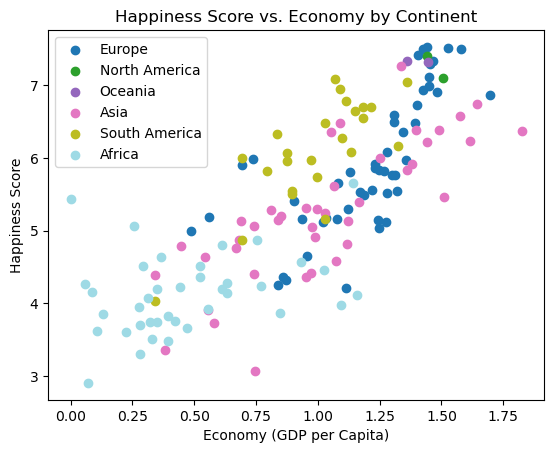

In [81]:
# Define a color map for continents
colors = plt.cm.tab20(np.linspace(0, 1, len(df1['Continent'].unique())))

# Create a scatter plot for each continent
for i, continent in enumerate(df1['Continent'].unique()):
    data = df1[df1['Continent'] == continent]
    plt.scatter(data['Economy (GDP per Capita)'], data['Happiness Score'], label=continent, color=colors[i])

plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.title('Happiness Score vs. Economy by Continent')
plt.legend()
plt.show()

In [82]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.select_dtypes(include=[np.number])
    df = df.dropna(axis='columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for', fontsize=15)
    plt.show()

In [83]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number])  # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis='columns')
    df = df[[col for col in df if df[col].nunique() > 1]]  # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10:  # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.1, 0.2), xycoords='axes fraction', ha='left', va='center', size=textSize, color='red')
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [84]:
df1

,Country,Continent,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Africa,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Asia,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Africa,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Asia,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [85]:
# calculate mean and std of each region only mean and std
# remove contry and happiness rank
df3 = df1.copy()
df3 = df3.drop(['Country', 'Happiness Rank'], axis=1)
df3.groupby('Continent').agg([np.mean, np.std])
df3.head()

,Continent,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Europe,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Europe,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [86]:
# standardize the data first remove continent
df4 = df3.copy()
df4 = df4.drop(['Continent'], axis=1)
# standardize the data
scaled_data = StandardScaler().fit_transform(df4)
# convert to dataframe
df5 = pd.DataFrame(scaled_data, columns=df4.columns)
df5.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.883792,1.186299,1.392183,1.038507,1.436930,2.772822,0.893092,0.765200
1,1.868854,1.394308,1.322597,1.335903,1.479400,2.479192,0.286472,0.682387
2,1.861824,1.149536,1.465607,1.354712,1.346129,0.109558,1.756145,0.935379
3,1.859188,1.516148,1.253612,1.041788,1.551931,1.988876,1.022396,0.626918
4,1.784498,1.099253,1.282725,1.107924,1.379223,2.461213,0.092141,0.925370


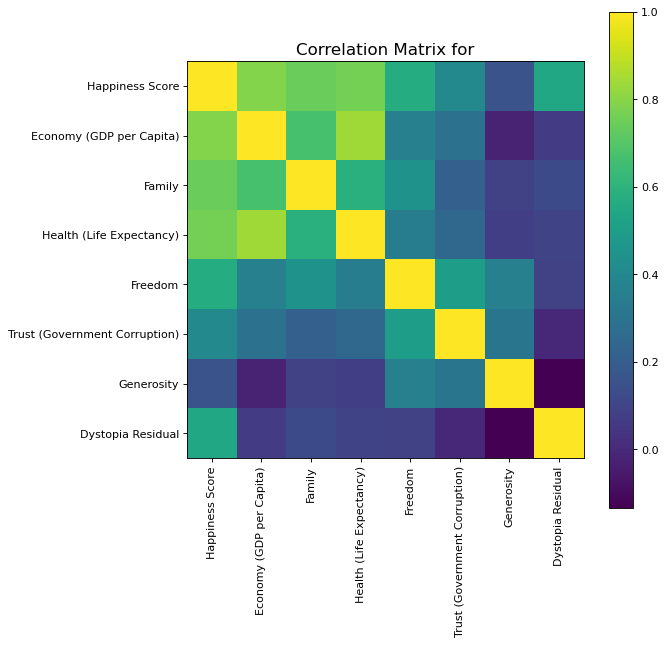

In [87]:
plotCorrelationMatrix(df5, 8)

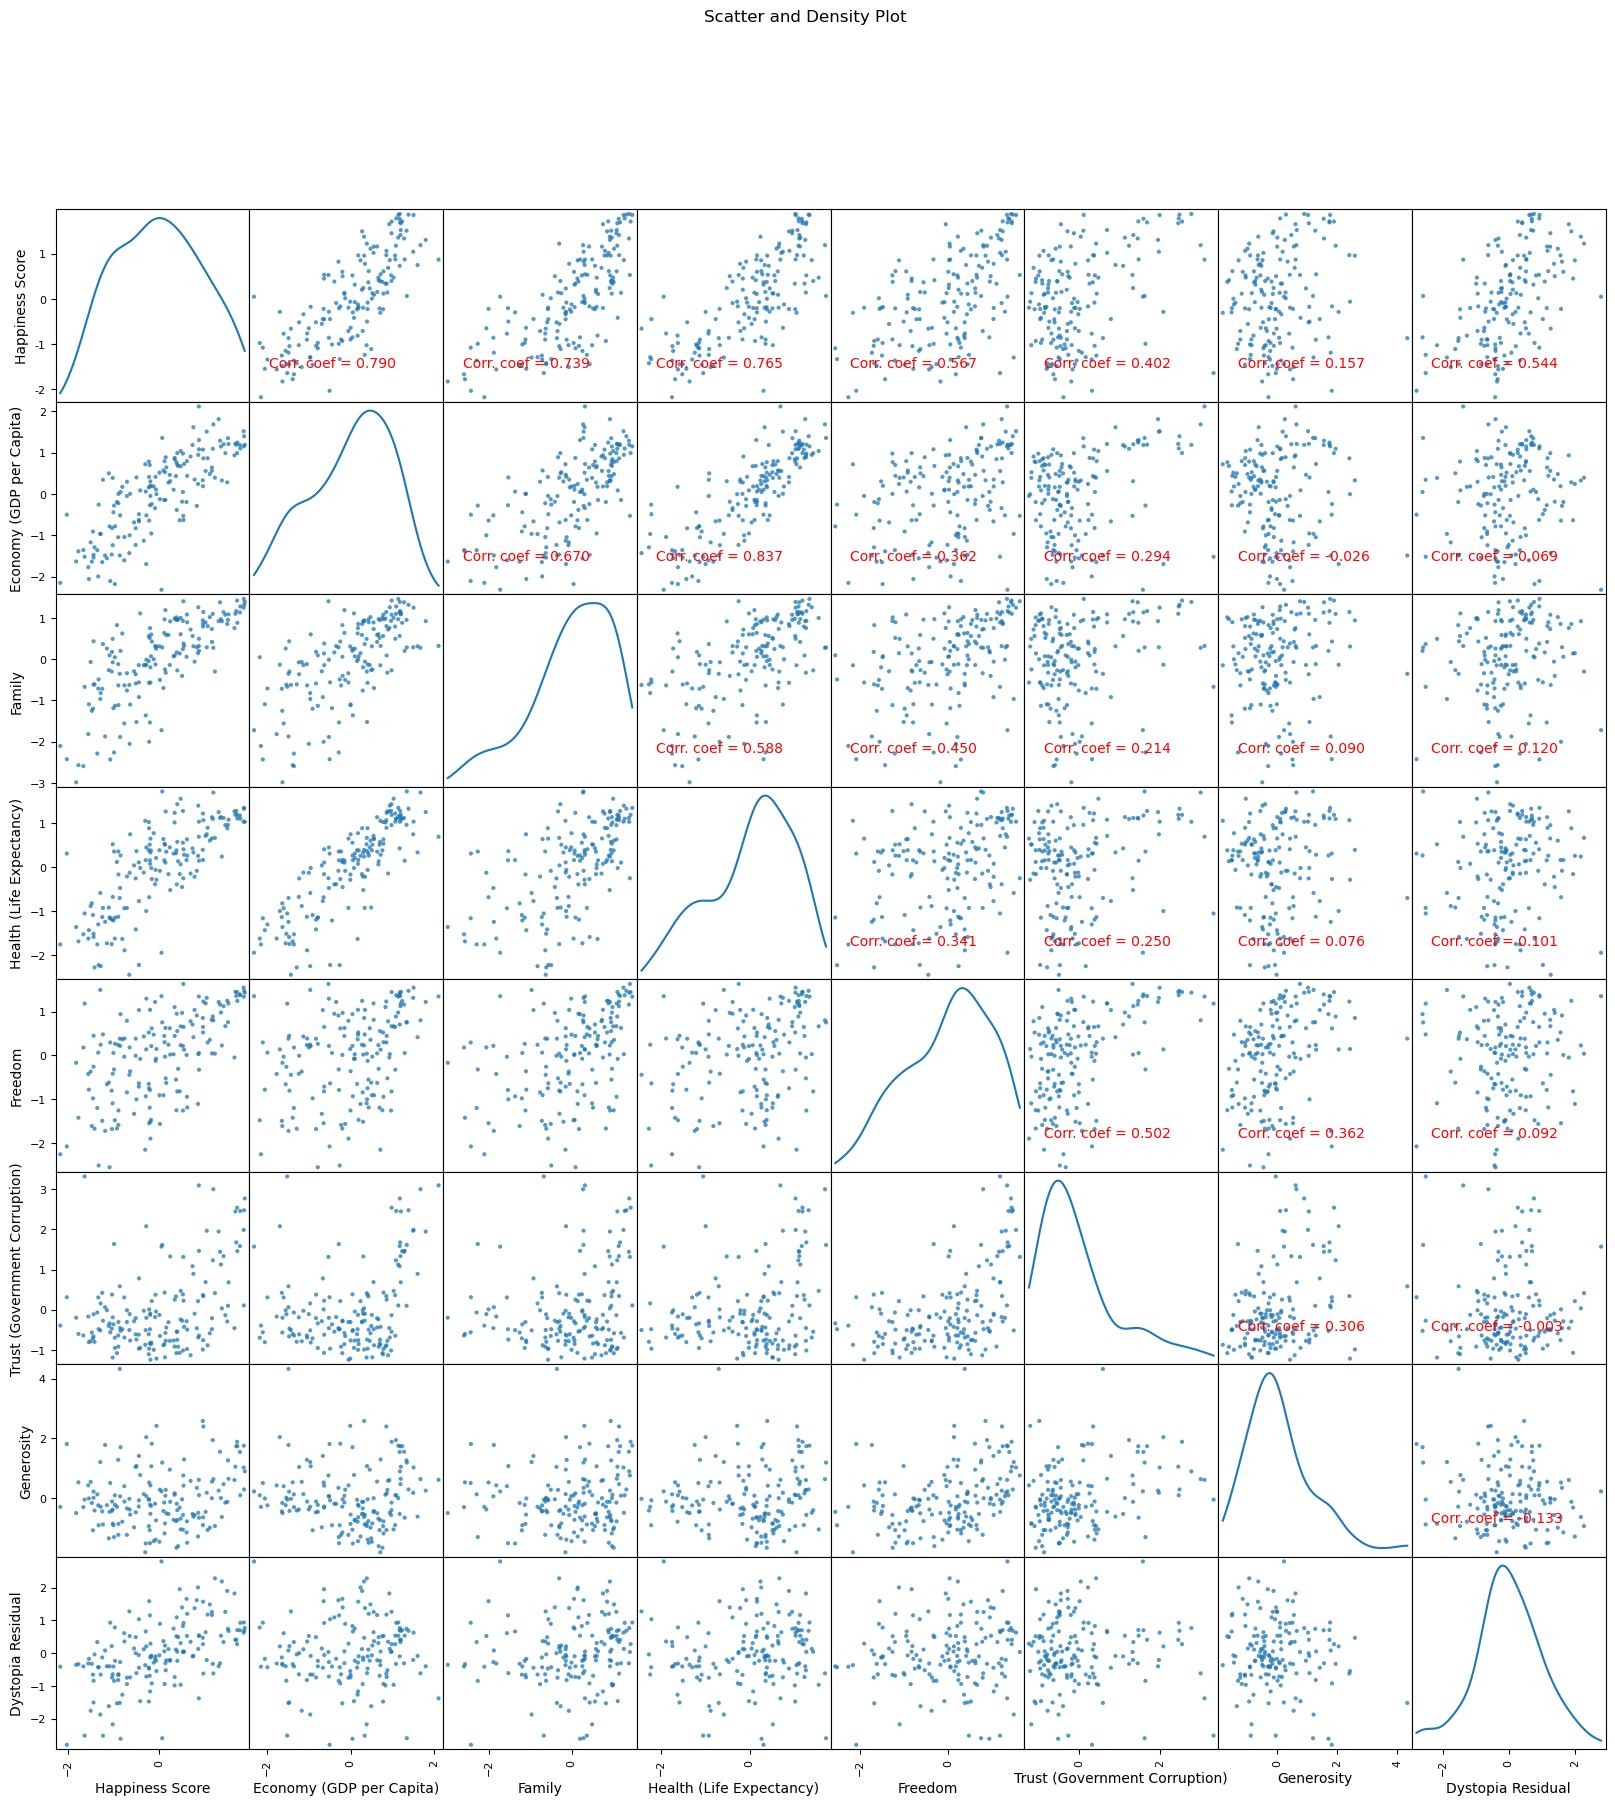

In [88]:
plotScatterMatrix(df5, 20, 10)

In [89]:
# how many regions are there?
df1['Continent'].unique(), df1['Continent'].nunique()

(array(['Europe', 'North America', 'Oceania', 'Asia', 'South America',
        'Africa'], dtype=object),
 6)

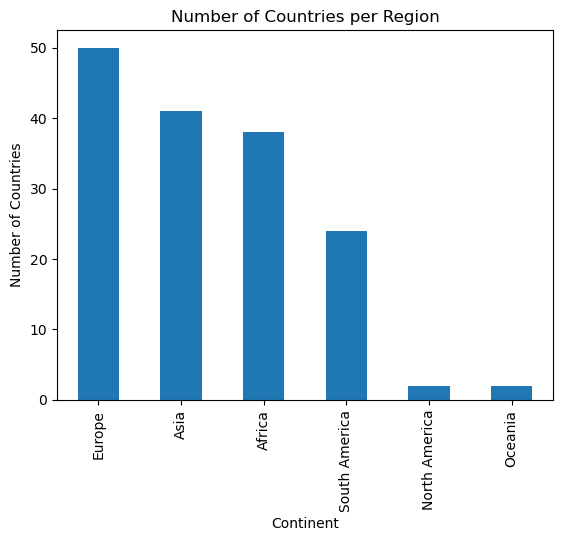

In [90]:
# count the number of countries in each region and show them in a histogram
df1['Continent'].value_counts().plot(kind='bar')
plt.xlabel('Continent')
plt.ylabel('Number of Countries')
plt.title('Number of Countries per Region')
plt.show()

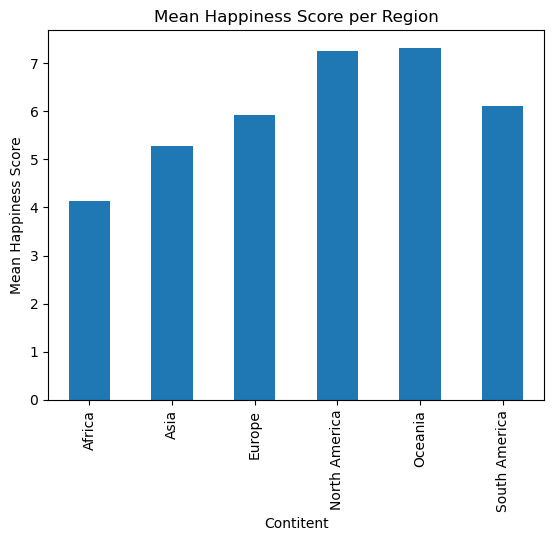

In [91]:
# calculate the mean happiness score for each region
df1.groupby('Continent')['Happiness Score'].mean().plot(kind='bar')
plt.xlabel('Contitent')
plt.ylabel('Mean Happiness Score')
plt.title('Mean Happiness Score per Region')
plt.show()

In [92]:
# calculate mean and std of each column
df1.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [93]:
df5

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.883792,1.186299,1.392183,1.038507,1.436930,2.772822,0.893092,0.765200
1,1.868854,1.394308,1.322597,1.335903,1.479400,2.479192,0.286472,0.682387
2,1.861824,1.149536,1.465607,1.354712,1.346129,0.109558,1.756145,0.935379
3,1.859188,1.516148,1.253612,1.041788,1.551931,1.988876,1.022396,0.626918
4,1.784498,1.099253,1.282725,1.107924,1.379223,2.461213,0.092141,0.925370
...,...,...,...,...,...,...,...,...
152,-1.667954,-1.358906,-2.593260,-1.519301,0.182540,-0.639785,-0.306272,-0.402757
153,-1.776914,-1.389834,-2.570014,-1.680443,-1.425056,-0.600845,0.525355,-0.333450
154,-1.827001,-1.635506,-2.985165,-1.353828,-0.166943,-0.196540,-0.506003,-0.352285
155,-2.032619,-0.502553,-2.425988,0.316341,-2.081277,0.313562,1.810072,-2.789904


In [94]:
# do svd
from scipy.linalg import svd
U, S, Vh = svd(df5, full_matrices=False)

# transpose Vh
V = Vh.T

Z = df5.dot(V)
Z.head()

,0,1,2,3,4,5,6,7
0,-3.880343,-1.296612,-0.850126,-1.005075,0.343957,-0.717791,0.066484,0.000347
1,-3.919373,-0.740657,-0.538363,-1.208841,0.204581,-0.362849,0.136552,0.000313
2,-3.417941,-0.468923,-0.611893,1.501150,0.103383,0.102784,-0.052793,-0.000287
3,-3.787835,-1.065806,-0.575602,-0.444088,0.218389,-0.270134,-0.285925,0.000338
4,-3.609313,-0.591671,-0.846395,-1.305957,0.101166,-0.479706,0.225441,-0.000281


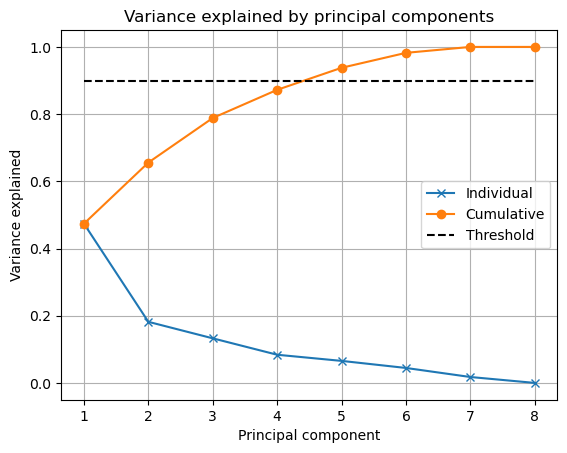

In [95]:
rho = (S*S) / (S*S).sum() 

threshold = 0.90

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components')
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()

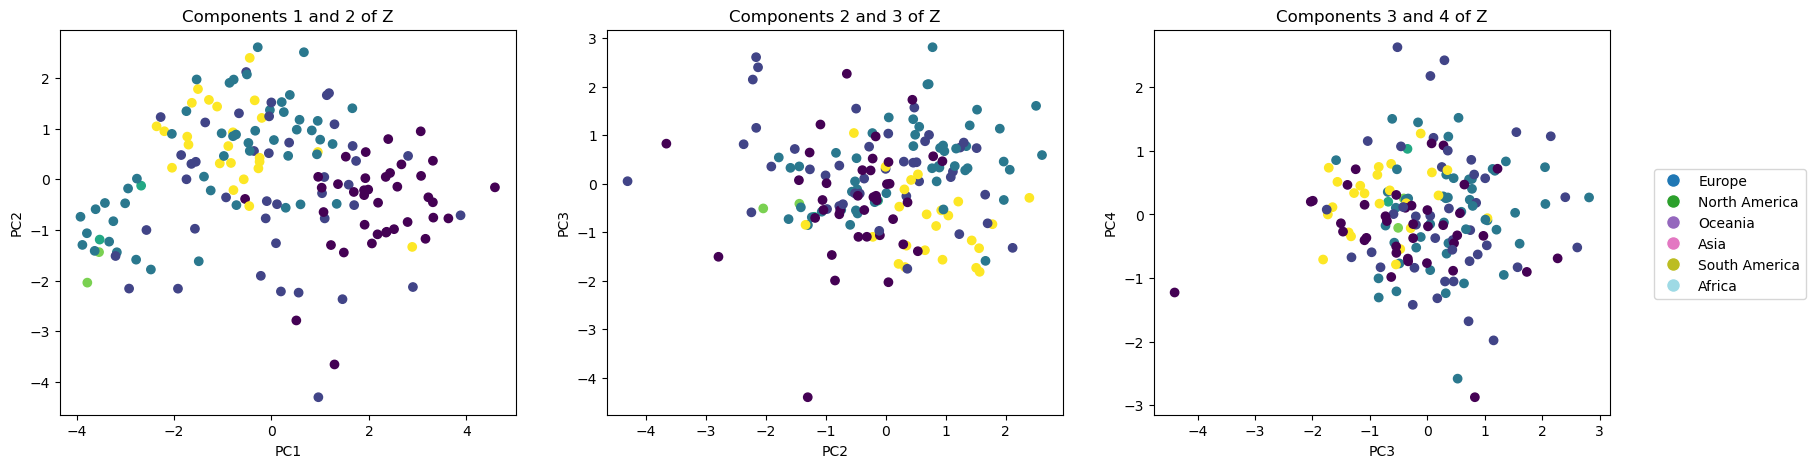

In [96]:
# make a subplot with (1,2) (2,3) (3,4) components of Z
colorcodes = df1['Continent'].astype('category').cat.codes

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
for i in range(3):
    axs[i].scatter(Z[i], Z[i+1], c=colorcodes)
    axs[i].set_xlabel(f'PC{i+1}')
    axs[i].set_ylabel(f'PC{i+2}')
    axs[i].set_title(f'Components {i+1} and {i+2} of Z')
    
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in zip(df1['Continent'].unique(), colors)]
    
# show legend to the right of the last subplot
fig.legend(legend_handles, df1['Continent'].unique(), loc='center right')
plt.show()


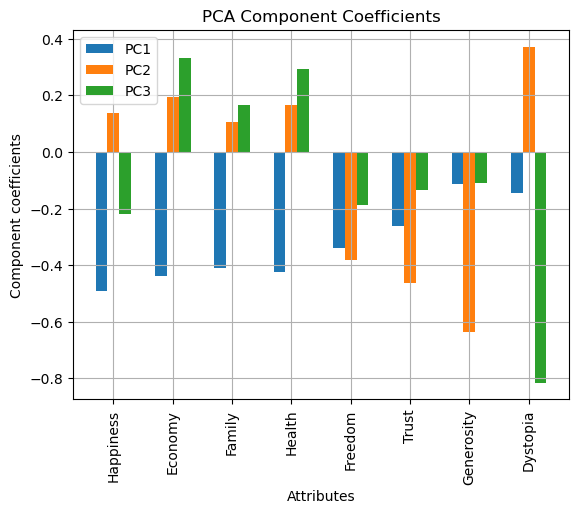

In [97]:
short_column_names = ['Happiness', 'Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia']
pcs = [0,1,2]
legendStrs = ['PC'+str(e+1) for e in pcs]
c = ['r','g','b']
bw = .2
r = np.arange(1,df5.shape[1]+1)
for i in pcs:    
    plt.bar(r+i*bw, V[:,i], width=bw)
plt.xticks(r+bw, short_column_names, rotation=90)
plt.xlabel('Attributes')
plt.ylabel('Component coefficients')
plt.legend(legendStrs)
plt.grid()
plt.title('PCA Component Coefficients')
plt.show()

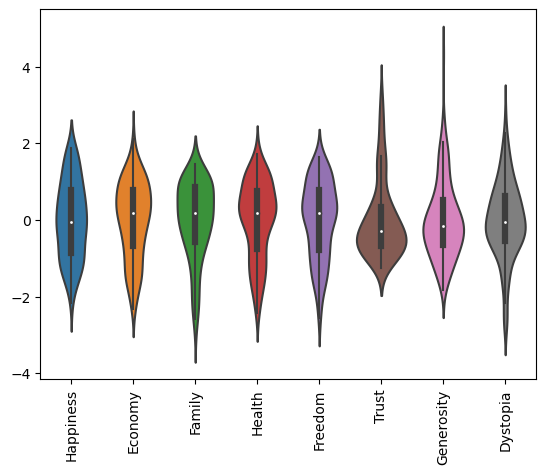

In [98]:
# make a violin plot with seaborn
import seaborn as sns
sns.violinplot(data=df5)
plt.xticks(range(df5.shape[1]), short_column_names, rotation=90)
plt.show()

/Users/frederik/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


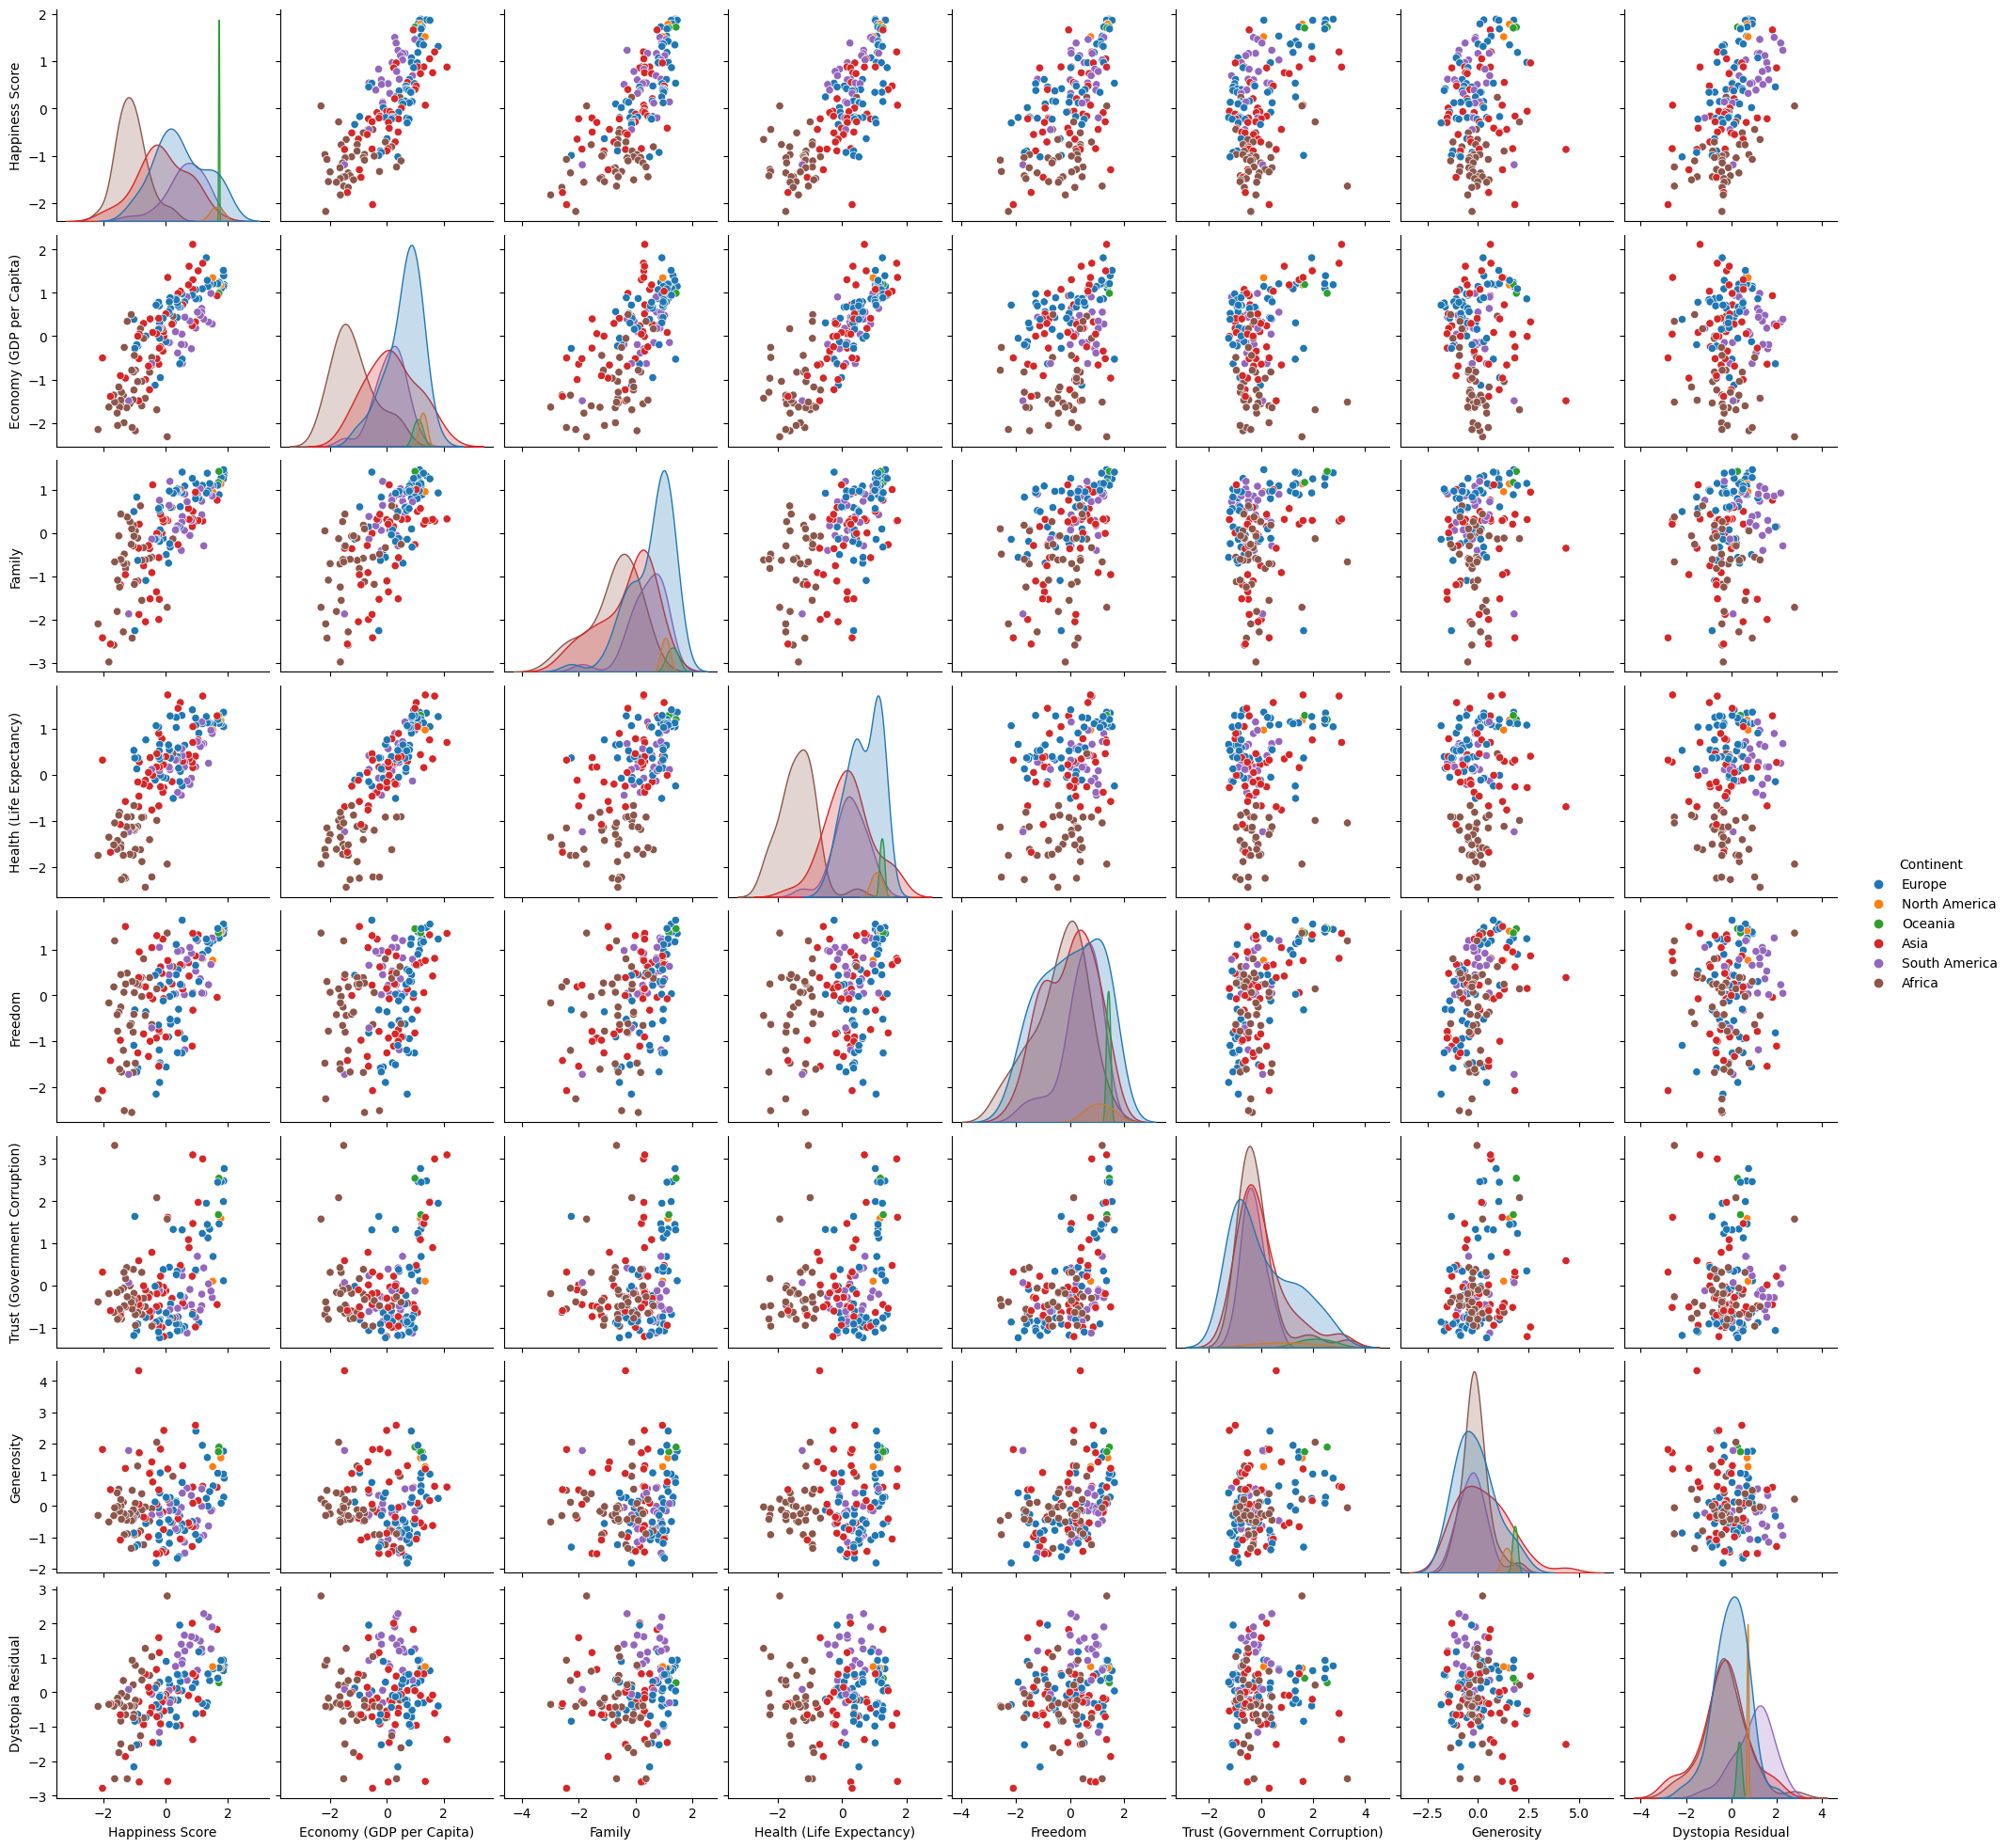

In [99]:
# plot pairplot with seaborn each continent has a different color
df6 = df5.copy()
df6['Continent'] = df1['Continent']
sns.pairplot(df6, hue='Continent')
plt.show()

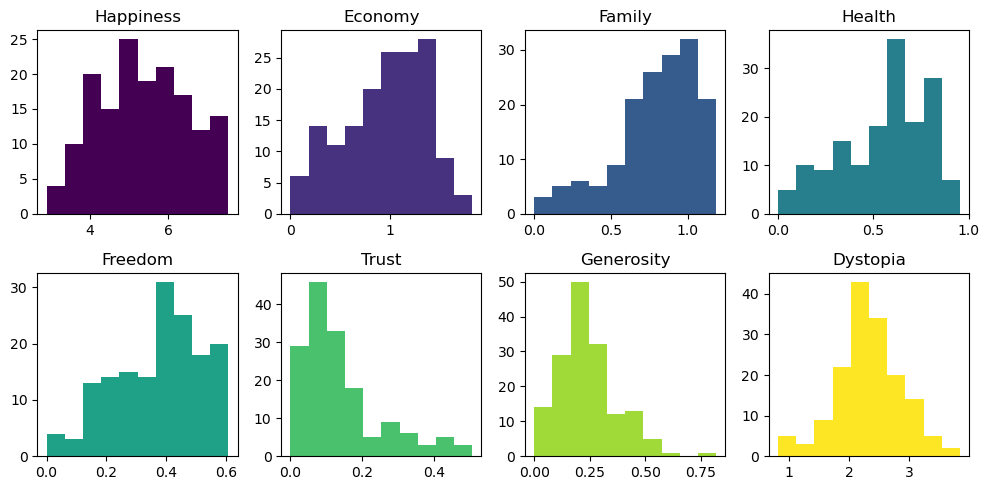

In [100]:
# use matplotlib to make a subplot of histograms of each column
colors = plt.cm.viridis(np.linspace(0, 1, len(df5.columns)))

fig, ax = plt.subplots(2, 4, figsize=(10, 5))
for i, col in enumerate(df4.columns):
    ax[i//4, i%4].hist(df4[col], color=colors[i], bins=10)
    ax[i//4, i%4].set_title(short_column_names[i])
    
plt.tight_layout()
plt.show()


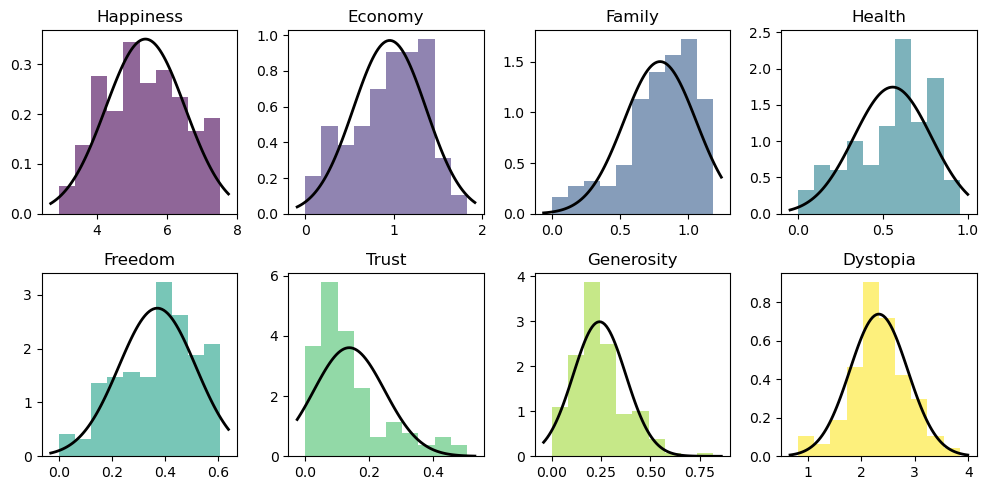

In [101]:
# fit a normal distribution to the data in a 4x2 grid
from scipy.stats import norm
from scipy import stats
fig, ax = plt.subplots(2, 4, figsize=(10, 5))

for i, col in enumerate(df4.columns):
    # fit a normal distribution to the data
    mu, std = norm.fit(df4[col])

    # plot histogram
    ax[i//4, i%4].hist(df4[col], bins=10, density=True, alpha=0.6, color=colors[i])

    # plot pdf
    xmin, xmax = ax[i//4, i%4].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax[i//4, i%4].plot(x, p, 'k', linewidth=2)
    ax[i//4, i%4].set_title(short_column_names[i])
    
plt.tight_layout()
plt.show()